# PHIGHT COVID capstone project

# data processing and cleaning

author: Daniel Nason

This file generates visualizations of the deaths/cases data over time, as well as some visualizations about changing teaching posture and variants present in Ohio during the timeframe of the analysis.

In [1]:
## loading in libraries for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#print(plt.style.available)
plt.style.use('seaborn-colorblind')

## plot for variants in OH over time

source: https://covariants.org/per-country?region=United+States&country=Ohio

other site that generated interesting graphics: https://outbreak.info/location-reports?loc=USA_US-OH&selected=Omicron&selected=Delta&selected=Alpha&selected=Beta&selected=Gamma

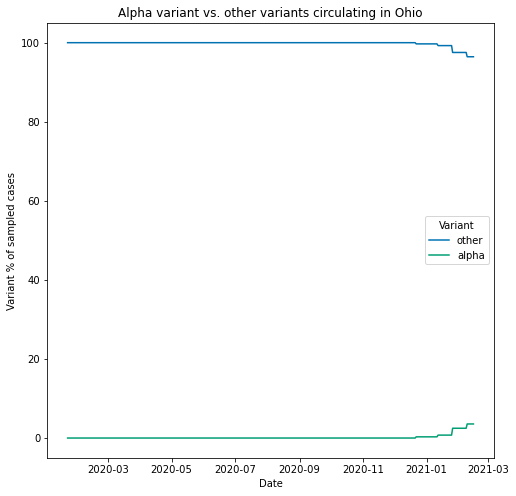

In [8]:
variants = pd.read_csv('ohio_covid_variants.csv', index_col = 0, parse_dates = ['date'], usecols = ['date','other_ratio', 'alpha_ratio'])
#variants.melt(ignore_index = False, var_name = 'variant', value_name = 'variant_perc')
variants_plot = variants\
    .rename(columns = {'other_ratio':"other", 'alpha_ratio':'alpha'})\
    .melt(ignore_index = False, var_name = 'Variant', value_name = 'Variant Percentage')
variants_plot['Variant percentage of sampled cases'] = variants_plot['Variant Percentage'].mul(100)
plt.figure(figsize = (8,8))
sns.lineplot(data = variants_plot,
            x = variants_plot.index,
            y = 'Variant percentage of sampled cases',
            ci = None,
            hue = 'Variant')
plt.ylabel('Variant % of sampled cases')
plt.xlabel('Date')
plt.title('Alpha variant vs. other variants circulating in Ohio')
plt.show()

## updated data 

includes information on the starting/ending teaching posture and changes over time

In [3]:
data = pd.read_csv('deaths_teaching_mobility_posture.csv', index_col = 0, parse_dates = ['date'])
data.set_index('date', inplace = True)
data

,county,fips,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,newconfirmed,rev_newdeaths,...,Unknown_start,major_teaching_start,county_enroll_end,Hybrid_end,On Premises_end,Online Only_end,Other_end,Pending_end,Unknown_end,major_teaching_end
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,ADAMS,39001,38.845411,-83.471896,27960,0,0,0,0,0,...,0.000000,On_Premises,4976.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,Hybrid
2020-01-22,ALLEN,39003,40.772852,-84.108023,106160,0,0,0,0,0,...,0.000000,Hybrid,16319.0,0.478951,0.469882,0.051167,0.000000,0.000000,0.0,Hybrid
2020-01-22,ASHLAND,39005,40.847723,-82.272808,53973,0,0,0,0,0,...,0.000000,Hybrid,7452.0,0.727053,0.000000,0.129764,0.143183,0.000000,0.0,Hybrid
2020-01-22,ASHTABULA,39007,41.708603,-80.748302,98637,0,0,0,0,0,...,0.000000,Hybrid,12031.0,0.633281,0.261574,0.105145,0.000000,0.000000,0.0,Hybrid
2020-01-22,ATHENS,39009,39.334256,-82.042786,67121,0,0,0,0,0,...,0.000000,Online_Only,7412.0,0.640448,0.000000,0.359552,0.000000,0.000000,0.0,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-15,WASHINGTON,39167,39.456906,-81.491214,61549,4413,86,0,26,0,...,0.000000,Hybrid,5312.0,0.876694,0.123306,0.000000,0.000000,0.000000,0.0,Hybrid
2021-02-15,WAYNE,39169,40.829259,-81.888448,117082,7699,208,0,13,0,...,0.000000,Hybrid,14429.0,0.557835,0.252062,0.000000,0.190103,0.000000,0.0,Hybrid
2021-02-15,WILLIAMS,39171,41.560520,-84.584296,37663,2963,77,0,7,0,...,0.000000,Hybrid,6076.0,0.202765,0.713957,0.000000,0.000000,0.083278,0.0,On_Premises


## posture change EDA

These plots look at how the starting and ending majority teaching posture ends for each county.

In [ ]:
posture = data.groupby('county')['posture_change', 'metropolitan_status', 'nchs_urban_rural_status'].min().reset_index()
posture

In [ ]:
# posture change by count
sns.countplot(data = posture, x = 'posture_change')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
## posture change by percentage
data.posture_change.value_counts(normalize = True).plot(kind = 'bar')
plt.title('Percentage of majority teaching posture change type')
plt.ylabel('Percentage of majority teaching posture change type')
plt.xlabel('Teaching posture change type')
plt.show()

In [ ]:
sns.countplot(data = posture, x = 'posture_change', hue = 'metropolitan_status')
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('No major differences in changing majority posture by metro status')
plt.legend(loc = "center right")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sns.histplot(x = posture.posture_change, hue = posture.metropolitan_status, multiple = 'dodge',
            stat = 'density', shrink = 0.8, common_norm = False)
plt.ylabel('Percentage of change type')
plt.xlabel('Majority posture change type')
plt.title('No major differences in changing majority posture by metro status')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
sns.countplot(x = 'posture_change', data = posture, hue = 'nchs_urban_rural_status')
plt.legend(loc = "center right")
plt.xticks(rotation = 90)
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('Some variation in changing majority posture across NCHS status')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
sns.histplot(x = posture.posture_change, hue = posture.nchs_urban_rural_status, multiple = 'dodge',
            stat = 'probability', shrink = 0.8, common_norm = False)
plt.xticks(rotation = 90)
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('Some variation in changing majority posture across NCHS status')
plt.show()

## more general EDA

these plots focus on plotting the data (including the columns processed by our team) over time and disaggregating them based on the various categorical variables associated with each county.

In [4]:
county_mask = data.groupby("county")['population'].max().sort_values(ascending=False).index.tolist()

In [5]:
data.nchs_urban_rural_status.unique()

array(['Noncore', 'Small metro', 'Micropolitan', 'Large fringe metro',
       'Medium metro', 'Large central metro'], dtype=object)

In [6]:
data.rename(columns = {'rev_newconfirmed2':'New Cases', 'rev_newdeaths':'New Deaths'}, inplace = True)
# scaling the data - creating variables
# data['newconfirmed_per_1000'] = data.newconfirmed.div(1000)
# data['newdeaths_per_1000'] = data.newdeaths.div(1000)
# data['cumconfirmed_per_1000'] = data.cumconfirmed.div(1000)
# data['cumdeaths_per_1000'] = data.cumdeaths.div(1000)
# data.head()

## multiscale single plot

plots two time series on the same x-axis with different y-axes. useful for comparing related measures and seeing how similar they are (i.e. new deaths and new cases per day). 

In [9]:
# seaborn version
def multi_diff_scale_plot_over_time(a='New Cases', b = 'New Deaths', title = 'test'):
    tmp = data.groupby(data.index)[[a,b]].sum()
    ax = sns.lineplot(data = tmp, x= tmp.index, y = a, color = 'red', ci = None, label = a)
    lines, labels = ax.get_legend_handles_labels()
    ax2 = ax.twinx()
    sns.lineplot(data = tmp, x= tmp.index, y = b, color = 'blue', ci = None, label = b)
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    plt.title(title)
    plt.show()

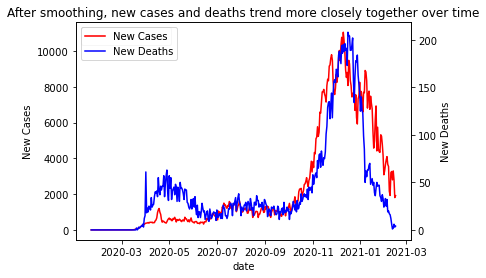

In [10]:
multi_diff_scale_plot_over_time(title = 'After smoothing, new cases and deaths trend more closely together over time')
plt.show()

## multiscale multiple plots

Similarly plots two different time series on the same x-axis, except now it manually facets the plots in order to better look at different subcategories. This was necessary since the seaborn version of the plot had issues with labeling the y-axes correctly.

In [ ]:
# Plots deaths/cases on a single plot cleanly
# pay attention to parameters
def manual_facet_twinx_plot(a='New Cases', b = 'New Deaths', col_sub = 'major_teaching', row = 1, col = 3, width = 12, height = 5, main = 'test'):
    # adjust for when row > 1 (nested for loop to adjust size of axes i.e. axes[0,1])
    fig, axes = plt.subplots(row, col, figsize = (width,height))
    tmp_list = data[col_sub].unique().tolist()
    if row == 1:
        for i in range(len(tmp_list)):
            tmp = data[data[col_sub] == tmp_list[i]].groupby(data[data[col_sub] == tmp_list[i]].index)[a,b].sum()
            data1 = tmp[a]
            data2 = tmp[b]
            t = tmp.index
            color = 'tab:red'
            axes[i].set_xlabel('Time')
            axes[i].set_ylabel(a, color = color)
            axes[i].plot(t, data1, color = color)
            axes[i].tick_params(axis = 'y', labelcolor = color)
            axes[i].tick_params(axis = 'x', rotation = 30)

            ax1 = axes[i].twinx()

            color = 'tab:blue'
            ax1.set_ylabel(b, color = color)
            ax1.plot(t, data2, color = color)
            ax1.tick_params(axis = 'y', labelcolor = color)
            plt.title(col_sub.title() + ': ' + tmp_list[i])
    else:
        for i in range(col):
            for j in range(row):
                k = j + i * (col - 1) # traversing across a 1-d list
                tmp = data[data[col_sub] == tmp_list[k]].groupby(data[data[col_sub] == tmp_list[k]].index)[a,b].sum()
                data1 = tmp[a]
                data2 = tmp[b]
                t = tmp.index
                color = 'tab:red'
                axes[j,i].set_xlabel('Time')
                axes[j,i].set_ylabel(a, color = color)
                axes[j,i].plot(t, data1, color = color)
                axes[j,i].tick_params(axis = 'y', labelcolor = color)
                axes[j,i].tick_params(axis = 'x', rotation = 30)

                ax1 = axes[j,i].twinx()

                color = 'tab:blue'
                ax1.set_ylabel(b, color = color)
                ax1.plot(t, data2, color = color)
                ax1.tick_params(axis = 'y', labelcolor = color)
                plt.title(col_sub.title() + ': ' + tmp_list[k])
    
    plt.suptitle(main, y = 0.98, size = 20)
    fig.tight_layout()    
    plt.show()

In [ ]:
manual_facet_twinx_plot()

## multiscale plots by counties

same plot (same x-axis over time with different y-axes) except now for counties.

In [ ]:
# mind the parameters, but will plot deaths/cases on a single plot cleanly
def county_manual_facet_twinx_plot(a='New Cases', b = 'New Deaths', num_county = 9, row = 3, col = 3, width = 12, height = 5, main = 'test'):
    fig, axes = plt.subplots(row, col, figsize = (width,height))
    tmp_list = county_mask[:num_county]
    for i in range(col):
        for j in range(row):
            k = j + i * col # traversing across a 1-d list
            tmp = data.loc[data.county == tmp_list[k], [a,b]]
            
            data1 = tmp[a]
            data2 = tmp[b]
            t = tmp.index
            color = 'tab:red'
            axes[j,i].set_xlabel('Time')
            axes[j,i].set_ylabel(a, color = color)
            axes[j,i].plot(t, data1, color = color)
            axes[j,i].tick_params(axis = 'y', labelcolor = color)
            axes[j,i].tick_params(axis = 'x', rotation = 30)

            ax1 = axes[j,i].twinx()

            color = 'tab:blue'
            ax1.set_ylabel(b, color = color)
            ax1.plot(t, data2, color = color)
            ax1.tick_params(axis = 'y', labelcolor = color)
            plt.title(tmp_list[k].title() + ': (' + str(k+1) + ' largest county)')

    plt.suptitle(main, y = 0.98, size = 20)
    fig.tight_layout()    
    plt.show()

In [ ]:
county_manual_facet_twinx_plot()

## individual time series plots

plots a specific time series, aggregating the measure across all counties.

In [ ]:
# time series plotting function
def time_series_plotter(var = 'New Cases'):
    sns.relplot(data = data.groupby(data.index)[var].sum(),
           x = data.groupby(data.index)[var].sum().index,
           y = data.groupby(data.index)[var].sum(),
           kind = 'line',
           ci = None)
    plt.title(var + ' over time')
    plt.show()

## county grid plot for single variable

plots a specific time series by county in each part of the grid.

In [16]:
def county_time_series_grid_plotter(var = 'New Cases', num_county = 9, wrap = 3):
    g = sns.relplot(data = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False),
       x = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False).index,
       y = var,
        kind = 'line',
       col = 'county',
       col_wrap = wrap)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(var + ' of the ' + str(num_county) + ' largest counties', fontsize = 20)
    plt.show()

<Figure size 576x576 with 0 Axes>

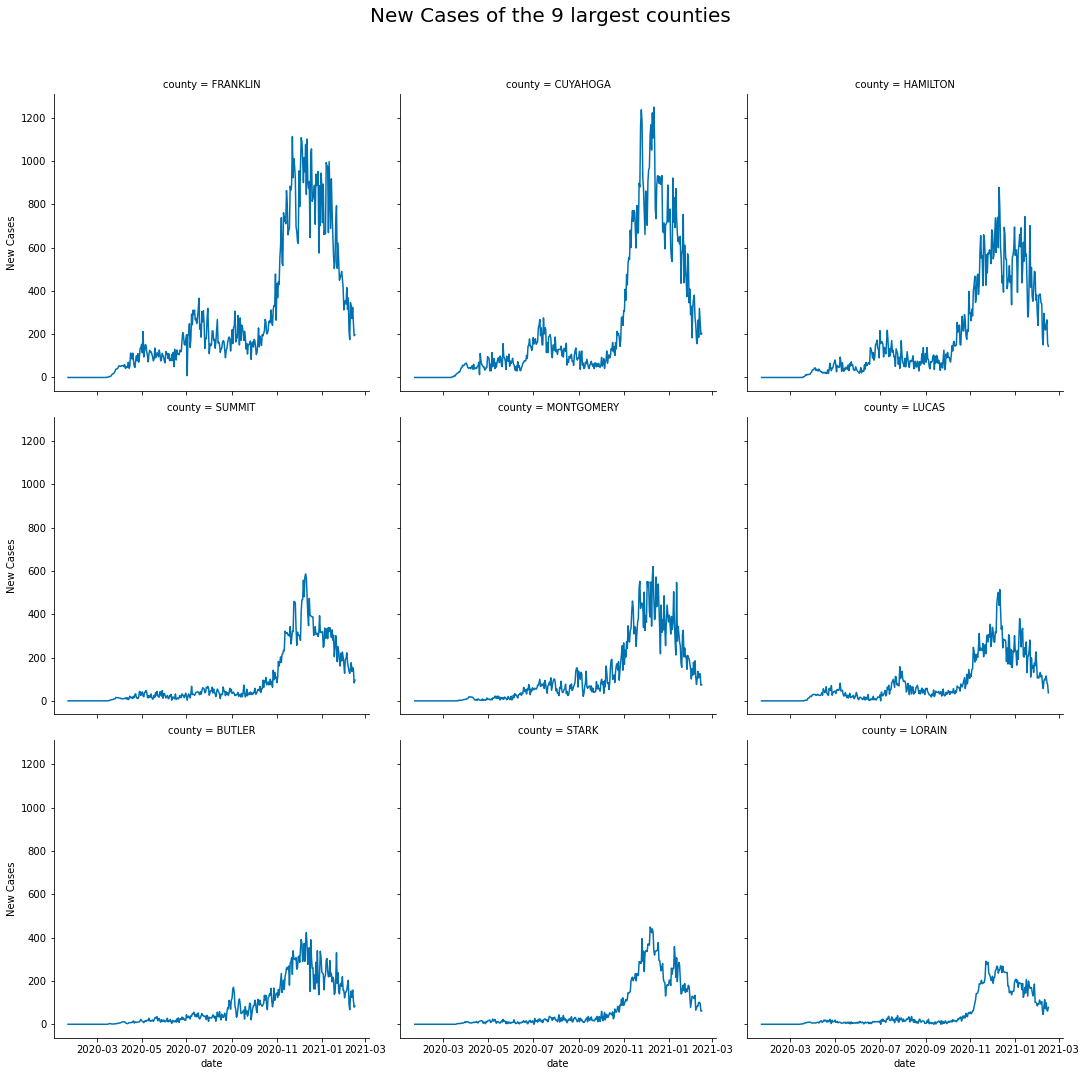

In [18]:
plt.figure(figsize = (8,8))
county_time_series_grid_plotter()

## multi line on single plot

plots multiple counties on a single plot for a specific time series.

In [19]:
def county_time_series_single_plotter(var = 'New Cases', num_county = 9):
    sns.relplot(data = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False),
       x = data[data.county.isin(county_mask[:num_county])].sort_values(by = 'population', ascending = False).index,
       y = var,
        kind = 'line',
       hue = 'county')
    plt.title(var + ' for the ' + str(num_county) + ' largest counties')
    plt.show()

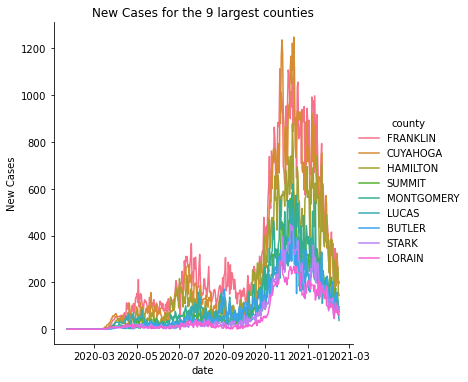

In [20]:
county_time_series_single_plotter()

## plotting with other categorical data

plots a specific time series and accounts for different categories on the same plot.

In [23]:
def category_time_series_single_plotter(var = 'New Deaths', cat = 'metropolitan_status'):
    sns.relplot(data = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var),
       x = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var).index,
       y = var,
        kind = 'line',
       hue = cat,
           ci = None)
    plt.title(var + ' by ' + str(cat))
    plt.show()

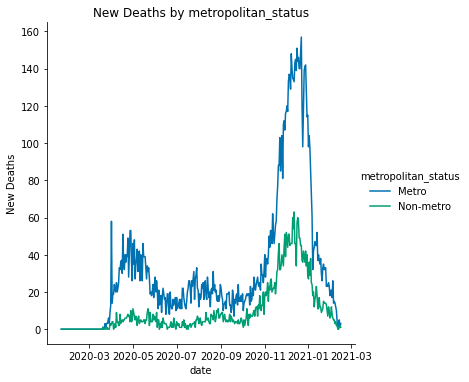

In [24]:
category_time_series_single_plotter()

## grid plots for categories

plots a specific category in a grid format instead of overlaying the lines on a single graphic.

In [26]:
def category_time_series_grid_plotter(var = 'newdeaths', cat = 'metropolitan_status', wrap = 3):
    sns.relplot(data = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var),
       x = data.groupby([cat,data.index])[var].sum().unstack(0).melt(ignore_index = False, value_name = var).index,
       y = var,
        kind = 'line',
       col = cat,
                col_wrap = wrap,
           ci = None)
    plt.show()

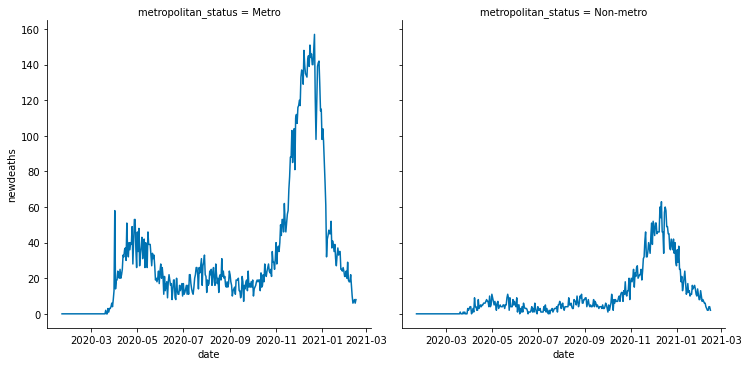

In [27]:
category_time_series_grid_plotter()